In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MD_Agric= pd.read_csv('MD_agric_exam-4313.csv')
MD_Agric.head(5)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [4]:
MD_Agric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [5]:
MD_Agric.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [12]:
unique_crop_types = MD_Agric['Crop_type'].unique()

# Get the number of unique crop types
num_unique_crop_types = len(unique_crop_types)

print("Number of unique crop types:", num_unique_crop_types)

Number of unique crop types: 8


In [14]:
# Filter the dataset to include only rows where crop_type is 'wheat'
wheat_data = MD_Agric[ MD_Agric['Crop_type'] == 'wheat']

# Find the maximum annual yield for wheat crop type
max_yield_wheat = wheat_data['Annual_yield'].max() 

# Round the maximum annual yield to 2 decimal places
max_yield_wheat_rounded = round(max_yield_wheat, 2)

print("Maximum annual yield for wheat crop type:", max_yield_wheat_rounded)

Maximum annual yield for wheat crop type: 8.99


Find the total rainfall for crop types where the average pollution level is above 0.2.


In [16]:
# Calculate the average pollution level for each crop type
average_pollution = MD_Agric.groupby('Crop_type')['Pollution_level'].mean()

# Filter crop types where the average pollution level is above 0.2
high_pollution_crop_types = average_pollution[average_pollution > 0.2].index

# Filter the dataset to include only rows with crop types in high_pollution_crop_types
filtered_data = MD_Agric[ MD_Agric['Crop_type'].isin(high_pollution_crop_types)]

# Calculate the total rainfall for the filtered crop types
total_rainfall = filtered_data['Rainfall'].sum()

print("Total rainfall for crop types with average pollution level above 0.2:", total_rainfall)

Total rainfall for crop types with average pollution level above 0.2: 941959.7


Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [17]:
def calculate_temperature_range(field_id):
   
    # Filter the dataset for the given Field_ID
    field_data = MD_Agric[MD_Agric['Field_ID'] == field_id]
    
    if field_data.empty:
        return f"No data found for Field_ID {field_id}"
    
    # Calculate the temperature range (Max_temperature_C - Min_temperature_C)
    temperature_range = field_data['Max_temperature_C'].max() - field_data['Min_temperature_C'].min()
    
    return temperature_range

# Call the function with the given Field_IDs
field_ids = [1458, 1895, 5443]
results = {}

for field_id in field_ids:
    results[field_id] = calculate_temperature_range(field_id)

print("Results:")
for field_id, result in results.items():
    print(f"Field ID: {field_id}, Temperature Range: {result}°C")


Results:
Field ID: 1458, Temperature Range: 40.7°C
Field ID: 1895, Temperature Range: 35.7°C
Field ID: 5443, Temperature Range: 33.4°C


Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [18]:
# Filter the dataset for plots where pH is less than 5.5
filtered_data = MD_Agric[MD_Agric['pH'] < 5.5]

# Calculate the total plot size for the filtered plots
total_plot_size = filtered_data['Plot_size'].sum()

print("Total plot size for plots where pH is less than 5.5:", total_plot_size)

Total plot size for plots where pH is less than 5.5: 1731.8999999999999


Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [19]:
# Filter the dataset for entries with 'Min_temperature_C' < -5 and 'Max_temperature_C' > 30
filtered_data = MD_Agric[(MD_Agric['Min_temperature_C'] < -5) & (MD_Agric['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered dataset
num_rows_filtered = len(filtered_data)

print("Number of rows in the filtered dataset:", num_rows_filtered)

Number of rows in the filtered dataset: 319


Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).



In [21]:
# Calculate the median plot size
median_plot_size = MD_Agric['Plot_size'].median()

# Filter the dataset for plots where the plot size is larger than the median plot size
filtered_data = MD_Agric[MD_Agric['Plot_size'] > median_plot_size]

# Calculate the standard deviation of rainfall for the filtered plots
rainfall_std_dev = np.std(filtered_data['Rainfall'])

# Round the result to 2 decimal places
rainfall_std_dev_rounded = round(rainfall_std_dev, 2)

print("Standard deviation of Rainfall for plots where Plot_size is larger than the median plot size:",
      rainfall_std_dev_rounded)

Standard deviation of Rainfall for plots where Plot_size is larger than the median plot size: 469.62


If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [22]:

# Find the most common Max_temperature_C
most_common_max_temp = MD_Agric['Max_temperature_C'].mode().iloc[0]  # Use iloc[0] to get the first mode if multiple modes exist

# Find the least common Crop_type
least_common_crop_type = MD_Agric['Crop_type'].value_counts().idxmin()

# Concatenate the first three digits of the most common Max_temperature_C with the last three letters of the least common Crop_type
result_string = str(most_common_max_temp)[:3] + least_common_crop_type[-3:]

print("Resulting string:", result_string)

Resulting string: 30.ice


Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

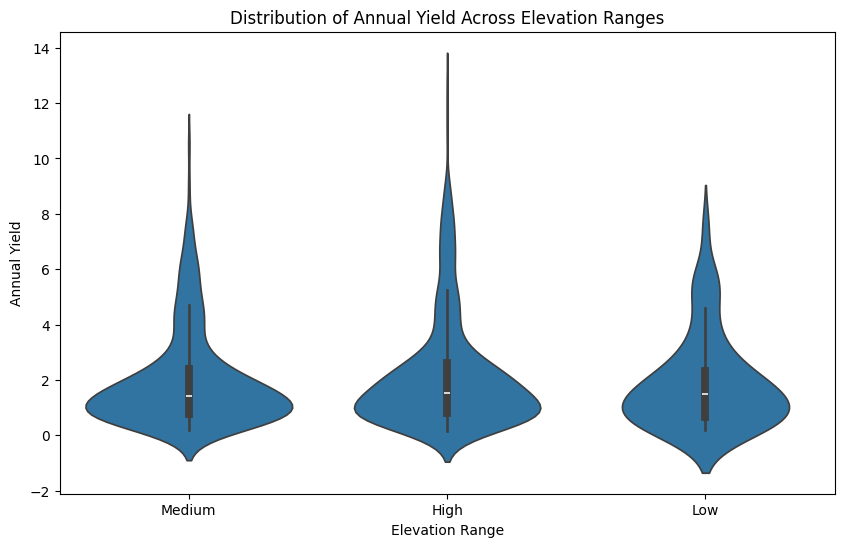

In [24]:
# Define elevation range categories
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'

# Apply elevation categorization to the dataset
MD_Agric['Elevation_category'] = MD_Agric['Elevation'].apply(categorize_elevation)

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_category', y='Annual_yield', data=MD_Agric)
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()

Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [27]:
def sum_crop_type_lengths(data, index=0, unique_crops=None):
    if unique_crops is None:
        unique_crops = set(data['Crop_type'].unique())
    
    # Base case: If all unique crop types have been processed, return 0
    if index >= len(unique_crops):
        return 0
    
    # Get the current crop type
    current_crop = list(unique_crops)[index]
    
    # Calculate the length of the current crop type and add it to the sum
    crop_length = len(current_crop)
    
    # Recursively sum the lengths of the remaining crop types
    remaining_sum = sum_crop_type_lengths(data, index + 1, unique_crops)
    
    return crop_length + remaining_sum

# Call the recursive function to calculate the sum
total_sum = sum_crop_type_lengths(MD_Agric)

print("Total sum of integer values for each unique crop type:", total_sum)

Total sum of integer values for each unique crop type: 42


Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [29]:
from scipy.stats import ttest_ind

# Filter the dataset for 'coffee' and 'banana' crop types
coffee_data = MD_Agric[MD_Agric['Crop_type'] == 'coffee']['Annual_yield']
banana_data = MD_Agric[MD_Agric['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_data, banana_data, equal_var=False)

# Print p-value rounded to three decimal places
print("p-value:", round(p_value, 3))

p-value: 0.598
